##Задание
Вопросы по заданию
Загрузите dataset.csv - синтетический набор данных с 5 признаками и 1 целевой переменной (dataset.csv).
Изучите данные, проведя EDA.
Выберите классификатор.
Метрика оценки - ROC AUC. Хорошо подобранная и обученная модель должна иметь ROC AUC не менее 70% на тестовых данных.

In [186]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import seaborn as sns
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
%matplotlib inline

Загружаем данные, выделяем X и Y

In [187]:
data = pd.read_csv('dataset.csv')
data

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.433306,-4.106981,1.252722,4.842634,7.610817,1
1,-0.216705,3.832332,-10.054348,-1.106758,1.987823,0
2,8.574821,-2.495187,5.404009,-6.219058,6.954602,1
3,7.673529,-4.234502,8.135008,3.748393,3.457908,0
4,3.548824,-2.588106,-2.095070,7.993792,-3.523852,1
...,...,...,...,...,...,...
2995,-10.510055,1.447894,-0.138512,0.918843,2.752979,0
2996,-9.802423,-5.085255,1.041877,4.370925,5.182877,0
2997,-6.332143,-0.315068,7.340215,-4.111093,5.746726,1
2998,-1.516059,-3.697544,9.363563,-0.907570,4.065678,0


In [189]:
X = data.drop(columns = 'target')

In [190]:
y = data.target

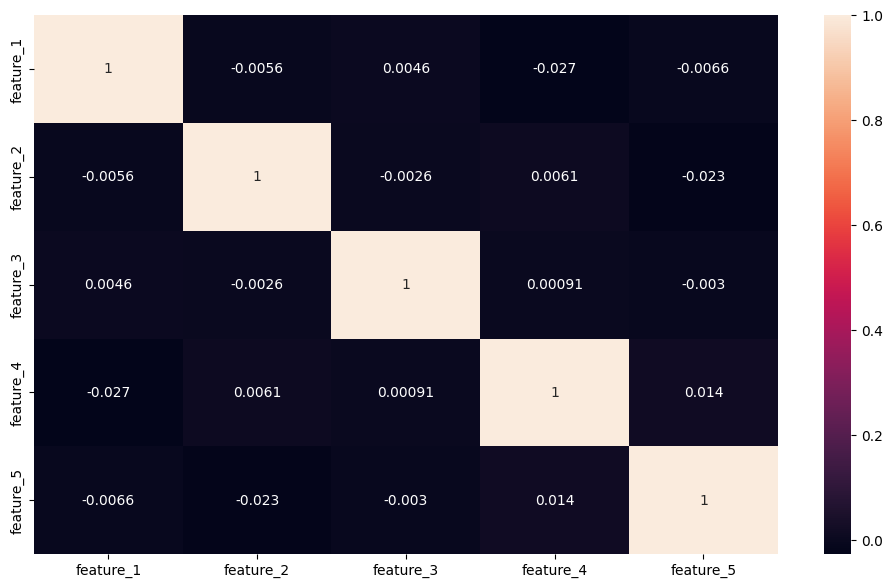

In [191]:
corr = pd.DataFrame(X).corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True)
plt.show()

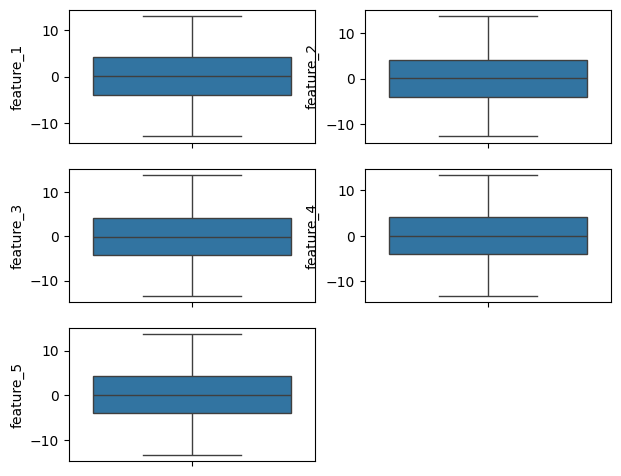

In [192]:
plt.figure(figsize=[7,10])

for i, j in zip(X.columns, range(len(X.columns))):
    plt.subplot(5, 2, j+1)
    sns.boxplot(X[i])

Видим, что фичи никак друг с другом не коррелируют, каждая имеет нормальное распределение. Добавим новые фичи на основе статистических показателей.

In [193]:
mean_feature = np.mean(X, axis = 1)
median_feature = np.median(X, axis = 1)
std_feature = np.std(X, axis = 1)

In [194]:
X['feature_6'] = mean_feature

In [195]:
X['feature_7'] = median_feature

In [196]:
X['feature_8'] = std_feature

In [197]:
X

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8
0,0.433306,-4.106981,1.252722,4.842634,7.610817,2.006500,1.252722,3.996744
1,-0.216705,3.832332,-10.054348,-1.106758,1.987823,-1.111531,-0.216705,4.792129
2,8.574821,-2.495187,5.404009,-6.219058,6.954602,2.443837,5.404009,5.764344
3,7.673529,-4.234502,8.135008,3.748393,3.457908,3.756067,3.748393,4.437562
4,3.548824,-2.588106,-2.095070,7.993792,-3.523852,0.667118,-2.095070,4.422098
...,...,...,...,...,...,...,...,...
2995,-10.510055,1.447894,-0.138512,0.918843,2.752979,-1.105770,0.918843,4.793461
2996,-9.802423,-5.085255,1.041877,4.370925,5.182877,-0.858400,1.041877,5.750056
2997,-6.332143,-0.315068,7.340215,-4.111093,5.746726,0.465728,-0.315068,5.346316
2998,-1.516059,-3.697544,9.363563,-0.907570,4.065678,1.461614,-0.907570,4.697200


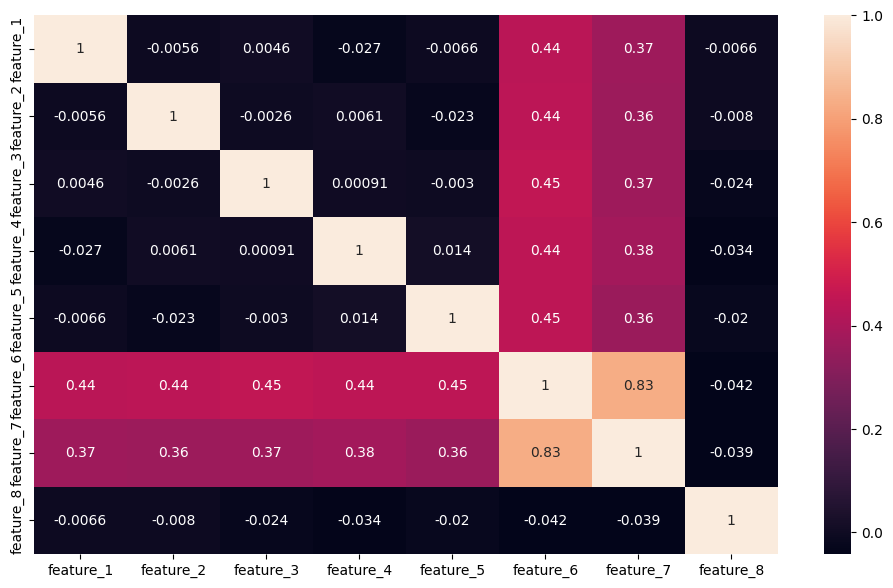

In [198]:
corr = pd.DataFrame(X).corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True)
plt.show()

Появилась корреляция между признаками! Проверим на ваыбросы

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  3000 non-null   float64
 1   feature_2  3000 non-null   float64
 2   feature_3  3000 non-null   float64
 3   feature_4  3000 non-null   float64
 4   feature_5  3000 non-null   float64
 5   target     3000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 140.8 KB


In [200]:
from scipy.stats import iqr
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

X['outlier_score'] = 0

for col in X.columns:
    Q1, Q3 = np.percentile(X[col], [25, 75])
    IQR = iqr(X[col])
    low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    X['outlier_score'] += np.where(X[col].between(low, high) | X['outlier_score'] == 1, 0, 1)

X['outlier_score'] += np.where(OneClassSVM(nu=0.05).fit_predict(X) == 1, 0, 1)
X['outlier_score'] += np.where(IsolationForest(random_state=42).fit_predict(X) == 1, 0, 1)
X['outlier_score'] += np.where(LocalOutlierFactor().fit_predict(X) == 1, 0, 1)

outliers = X[X['outlier_score'] > 3]
print(f' {len(outliers)} выбросов')
outliers

 0 выбросов


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,outlier_score


Делим данные на обучающую и тестовую выборку. Строим и обучаем модель. В качестве модели я выбрала случайный лес, потому что у нас довольно много признаков, нужно оценить их важность плюс данная модель снижает риск переобучения в отличии от классического дерева решений.

In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [203]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [204]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [205]:
pred = model.predict(X_test)

In [206]:
from sklearn.metrics import roc_auc_score

In [207]:
roc_auc_score(y_test, pred)

0.9097660081266639

Нужный результат получен! Можно попробовать еще его улучшить, используя полиномиальные признаки

In [208]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
X_poly = poly.fit_transform(X)

In [209]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 42
                                                      )

In [211]:
model.fit(X1_train, y_train)

RandomForestClassifier()

In [212]:
pred = model.predict(X1_test)

In [213]:
from sklearn.metrics import roc_auc_score
roc_auc_score (y_test, pred)

0.9227616645649434

Улучшили результат еще на 2 процента!
